**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: LUIS ALBERTO GUTIÉRREZ RIVERA
*   MATRÍCULA: A01251467


---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje de valores faltantes por columna.

In [43]:
#guarda, en un dataframe (air_df), todos sus registros.
import pandas as pd
from google.colab import drive
drive.mount('/content/drive.')
air_df = pd.read_csv('/LaqnData.csv')

#Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (shape, columns, head(), tail(), dtypes)
print("Shape:", air_df.shape)
print("Columns:", air_df.columns)
print("Head:\n", air_df.head())
print("Tail:\n", air_df.tail())
print("Data Types:\n", air_df.dtypes)

#Calcula el porcentaje de valores faltantes por columna.
porcentaje_faltante = air_df.isna().mean() * 100
print("Porcentaje de valores faltantes:\n", porcentaje_faltante)

Drive already mounted at /content/drive.; to attempt to forcibly remount, call drive.mount("/content/drive.", force_remount=True).
Shape: (43800, 6)
Columns: Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')
Head:
   Site Species   ReadingDateTime  Value   Units Provisional or Ratified
0  CT3      NO  01/01/2017 00:00    3.5  ug m-3                       R
1  CT3      NO  01/01/2017 01:00    3.6  ug m-3                       R
2  CT3      NO  01/01/2017 02:00    2.2  ug m-3                       R
3  CT3      NO  01/01/2017 03:00    2.1  ug m-3                       R
4  CT3      NO  01/01/2017 04:00    3.3  ug m-3                       R
Tail:
       Site Species   ReadingDateTime  Value   Units Provisional or Ratified
43795  CT3   PM2.5  31/12/2017 19:00   -2.0  ug m-3                       R
43796  CT3   PM2.5  31/12/2017 20:00    6.0  ug m-3                       R
43797  CT3   PM2.5  31/12/2017 21:00    5.0  ug 

2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [44]:
#Obtén la cantidad de valores únicos por columna (nunique())
unique_counts = air_df.nunique()
print("Valores únicos por columna:\n", unique_counts)

#¿Cuántas mediciones se hicieron?
cantidad_mediciones = air_df.shape[0]
print(f'La cantidad de mediciones en el excel es: {cantidad_mediciones}')

#¿Cuántos contaminantes del aire (Species) se analizaron?
print("Cantidad de contaminantes:", unique_counts['Species'])

#¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe
columnas_1_valor = air_df.columns[air_df.nunique() <= 1]
print("Columnas sin valor informativo",columnas_1_valor.tolist())
air_df = air_df.drop(columns=columnas_1_valor)
print("Dataframe modificado:")
print(air_df)
columna_a_verificar = 'Units'
valores_unicos = air_df[columna_a_verificar].unique()
print(f"\nValores únicos en la columna '{columna_a_verificar}': {valores_unicos}")
if all(isinstance(valor, str) for valor in valores_unicos):
    air_df = air_df.drop(columns=[columna_a_verificar])
    print(f"\nLa columna '{columna_a_verificar}' ha sido eliminada porque todos sus valores son cadenas que no proveen valor informativo.")
print(air_df)

Valores únicos por columna:
 Site                          1
Species                       5
ReadingDateTime            8760
Value                      1847
Units                         3
Provisional or Ratified       1
dtype: int64
La cantidad de mediciones en el excel es: 43800
Cantidad de contaminantes: 5
Columnas sin valor informativo ['Site', 'Provisional or Ratified']
Dataframe modificado:
      Species   ReadingDateTime  Value   Units
0          NO  01/01/2017 00:00    3.5  ug m-3
1          NO  01/01/2017 01:00    3.6  ug m-3
2          NO  01/01/2017 02:00    2.2  ug m-3
3          NO  01/01/2017 03:00    2.1  ug m-3
4          NO  01/01/2017 04:00    3.3  ug m-3
...       ...               ...    ...     ...
43795   PM2.5  31/12/2017 19:00   -2.0  ug m-3
43796   PM2.5  31/12/2017 20:00    6.0  ug m-3
43797   PM2.5  31/12/2017 21:00    5.0  ug m-3
43798   PM2.5  31/12/2017 22:00    5.0  ug m-3
43799   PM2.5  31/12/2017 23:00    6.0  ug m-3

[43800 rows x 4 columns]

Valores ú

3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [45]:
conteo_Species = air_df['Species'].value_counts()
print("\nConteo de valores por categoría (Species):")
print(conteo_Species)
total_categorias = len(air_df)
suma_categoria = conteo_Species.sum()
for Species, conteo in conteo_Species.items():
    if conteo == total_categorias:
        print(f"Todas las mediciones son de '{Species}'.")
    else:
        print(f"'{Species}' tiene {conteo} mediciones, que no coincide con el total de {total_categorias} mediciones.")
if suma_categoria == total_categorias:
    print(f"La suma de las mediciones de todas las categorías ({suma_categoria}) coincide con el total global ({total_categorias}).")
else:
    print(f"La suma de las mediciones de todas las categorías ({suma_categoria}) NO coincide con el total global ({total_categorias}).")


Conteo de valores por categoría (Species):
Species
NO       8760
NO2      8760
NOX      8760
PM10     8760
PM2.5    8760
Name: count, dtype: int64
'NO' tiene 8760 mediciones, que no coincide con el total de 43800 mediciones.
'NO2' tiene 8760 mediciones, que no coincide con el total de 43800 mediciones.
'NOX' tiene 8760 mediciones, que no coincide con el total de 43800 mediciones.
'PM10' tiene 8760 mediciones, que no coincide con el total de 43800 mediciones.
'PM2.5' tiene 8760 mediciones, que no coincide con el total de 43800 mediciones.
La suma de las mediciones de todas las categorías (43800) coincide con el total global (43800).


4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [46]:
promedio_por_species = air_df.groupby('Species')['Value'].mean().reset_index()
print(promedio_por_species)

  Species      Value
0      NO  15.045115
1     NO2  38.010185
2     NOX  61.078661
3    PM10  22.551704
4   PM2.5  14.999831


5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [47]:
air_df['ReadingDateTime'] = pd.to_datetime(air_df['ReadingDateTime'], format='%d/%m/%Y %H:%M')

pvt_df = air_df.pivot(index='ReadingDateTime', columns='Species', values='Value')
pvt_df.columns.name = None
print("DataFrame en formato ancho (pvt_df):")
print(pvt_df)

DataFrame en formato ancho (pvt_df):
                      NO   NO2   NOX  PM10  PM2.5
ReadingDateTime                                  
2017-01-01 00:00:00  3.5  30.8  36.2  35.7    NaN
2017-01-01 01:00:00  3.6  31.5  37.0  28.5    NaN
2017-01-01 02:00:00  2.2  27.3  30.7  22.7    NaN
2017-01-01 03:00:00  2.1  23.5  26.8  20.5    NaN
2017-01-01 04:00:00  3.3  28.0  33.0  22.1    NaN
...                  ...   ...   ...   ...    ...
2017-12-31 19:00:00  0.7  17.5  18.5  16.3   -2.0
2017-12-31 20:00:00  0.7  17.5  18.6  14.5    6.0
2017-12-31 21:00:00  0.7  14.1  15.1   8.6    5.0
2017-12-31 22:00:00  1.1  22.0  23.6  12.5    5.0
2017-12-31 23:00:00  0.9  19.4  20.7  10.4    6.0

[8760 rows x 5 columns]


6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [48]:
stats = dvt_df[['NO2', 'PM10', 'NO', 'PM2.5']].describe()
#¿Cuál es el mayor valor de NO2 registrado? ¿A qué día pertenece?
max_NO2_value = dvt_df['NO2'].max()
max_NO2_date = dvt_df['NO2'].idxmax().date()
print(f"\nMayor valor de NO2 registrado: {max_NO2_value} en el día: {max_NO2_date}")
#¿Cuál es el menor valor de PM10 registrado?¿A qué día pertenece?
min_PM10_value = dvt_df['PM10'].min()
min_PM10_date = dvt_df['PM10'].idxmin().date()
print(f"Menor valor de PM10 registrado: {min_PM10_value} en el día: {min_PM10_date}")
#¿Cuál es la mediana del NO? ¿Cómo se interpreta?
median_NO = dvt_df['NO'].median()
print(f"Mediana del NO: {median_NO} (La mediana es el valor que actua como el punto medio entre las dos mitades del conjunto de datos)")
#¿Cuál es el primer cuartil de PM2.5? ¿Qué significa?
first_qt_PM25 = dvt_df['PM2.5'].quantile(0.25)
print(f"Primer cuartil de PM2.5: {first_qt_PM25} (El primer cuartil significa que, dentro del 25% de los valores más bajos, estos son menores o mayores a este)")


Mayor valor de NO2 registrado: 120.2 en el día: 2017-01-24
Menor valor de PM10 registrado: -5.6 en el día: 2017-09-12
Mediana del NO: 7.1 (La mediana es el valor que actua como el punto medio entre las dos mitades del conjunto de datos)
Primer cuartil de PM2.5: 7.0 (El primer cuartil significa que, dentro del 25% de los valores más bajos, estos son menores o mayores a este)




```
# Esto tiene formato de código
```

7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

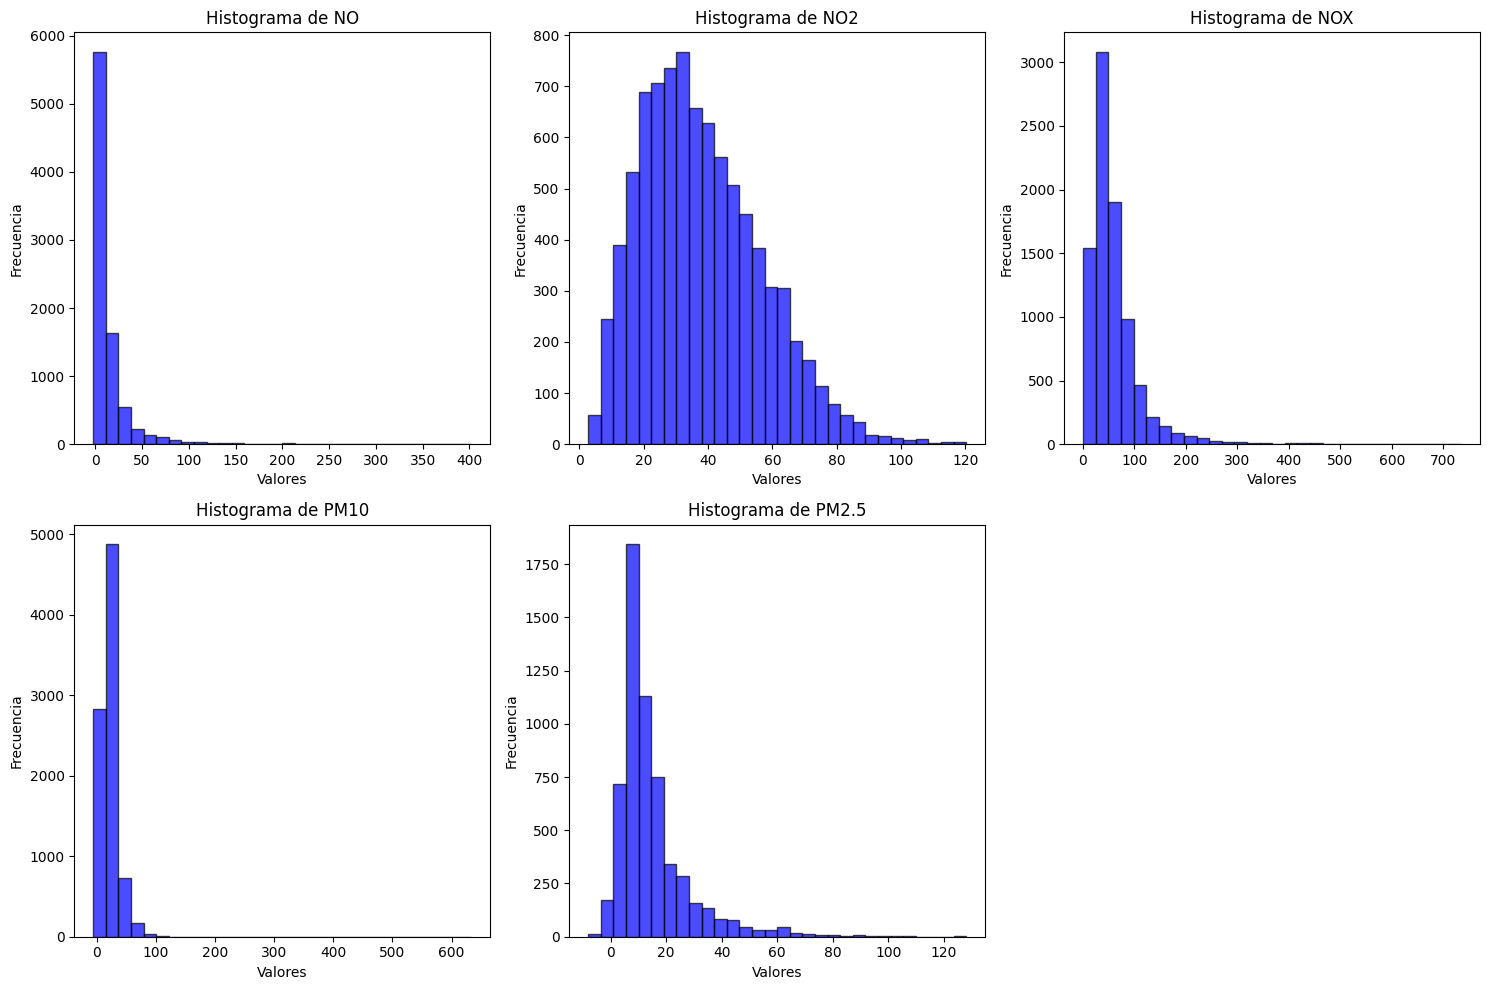

El contaminante con mayor variabilidad es NOX con una desviación estándar de 54.58.


In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
for column in pvt_df.columns:
    plt.subplot(2, 3, list(pvt_df.columns).index(column) + 1)  # Cambiar la disposición según el número de columnas
    plt.hist(pvt_df[column].dropna(), bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()
variabilidad = pvt_df.std()  # Desviación estándar como medida de variabilidad
contaminante_mayor_variabilidad = variabilidad.idxmax()
mayor_variabilidad = variabilidad.max()
print(f"El contaminante con mayor variabilidad es {contaminante_mayor_variabilidad} con una desviación estándar de {mayor_variabilidad:.2f}.")


8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [50]:
air_df = pd.read_csv('/LaqnData.csv') #hago que el código vuelva a leerse tal cual para no arrojar el Attribute Error en ReadingDateTime
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)
#Se separa en dos la columna ReadingDateTime con un espacio entre ellos
datetime_df.columns = ['Date','Time']
#las dos columnas obtenidas son llamadas Date y Time respectivamente
datetime_df
date_df = datetime_df.Date.str.split('/',expand=True)
#separa la columna de date del dataframe datetime_df en tres partes separados or '/'
date_df.columns = ['Day','Month','Year']
#De las columnas obtenidas, estas son nombrasas día, mes y año
date_df
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])
#se acopla el date_df al dataframe original air_df, reemplazando ReadingDateTime con las columnas obtenidas anteriormente
#Adicionalmente se elimina la columna Year
air_df = air_df.set_index(['Month','Day','Time','Species'])
#Se crea un nuevo índice con las columnas Month, Day, Time y Species
air_df
#Finalmente se tiene una vista previa de como queda el dataframe reestructurado

Site  Value   Units Provisional or Ratified
Month Day Time  Species                                            
01    01  00:00 NO       CT3    3.5  ug m-3                       R
          01:00 NO       CT3    3.6  ug m-3                       R
          02:00 NO       CT3    2.2  ug m-3                       R
          03:00 NO       CT3    2.1  ug m-3                       R
          04:00 NO       CT3    3.3  ug m-3                       R
...                      ...    ...     ...                     ...
12    31  19:00 PM2.5    CT3   -2.0  ug m-3                       R
          20:00 PM2.5    CT3    6.0  ug m-3                       R
          21:00 PM2.5    CT3    5.0  ug m-3                       R
          22:00 PM2.5    CT3    5.0  ug m-3                       R
          23:00 PM2.5    CT3    6.0  ug m-3                       R

[43800 rows x 4 columns]



```
# Esto tiene formato de código
```

9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales? R= A pesar de que arrojan resultados similares, estos no son iguales ya que .unstack() crea un formato ancho a partir del dataframe que cuenta con un índice con varios niveles, transformando estos niveles del dataframe en columnas. Se diferenicia del código anterior ya que unstack() no manipula de forma manual los niveles dentro de un indice para separar estos niveles en diferentes columnas

In [51]:
air_df.unstack()


Site                      Value                          \
Species           NO  NO2  NOX PM10 PM2.5    NO   NO2   NOX  PM10 PM2.5   
Month Day Time                                                            
01    01  00:00  CT3  CT3  CT3  CT3   CT3   3.5  30.8  36.2  35.7   NaN   
          01:00  CT3  CT3  CT3  CT3   CT3   3.6  31.5  37.0  28.5   NaN   
          02:00  CT3  CT3  CT3  CT3   CT3   2.2  27.3  30.7  22.7   NaN   
          03:00  CT3  CT3  CT3  CT3   CT3   2.1  23.5  26.8  20.5   NaN   
          04:00  CT3  CT3  CT3  CT3   CT3   3.3  28.0  33.0  22.1   NaN   
...              ...  ...  ...  ...   ...   ...   ...   ...   ...   ...   
12    31  19:00  CT3  CT3  CT3  CT3   CT3   0.7  17.5  18.5  16.3  -2.0   
          20:00  CT3  CT3  CT3  CT3   CT3   0.7  17.5  18.6  14.5   6.0   
          21:00  CT3  CT3  CT3  CT3   CT3   0.7  14.1  15.1   8.6   5.0   
          22:00  CT3  CT3  CT3  CT3   CT3   1.1  22.0  23.6  12.5   5.0   
          23:00  CT3  CT3  CT3  CT3   CT3   0.9  19.4  20.7  10.4   6.0   

                  Units                                        \
Species              NO     NO2            NOX   PM10   PM2.5   
Month Day Time                                                  
01    01  00:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          01:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          02:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          03:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          04:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
...                 ...     ...            ...    ...     ...   
12    31  19:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          20:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          21:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          22:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          23:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   

                Provisional or Ratified                     
Species                              NO NO2 NOX PM10 PM2.5  
Month Day Time                                              
01    01  00:00                       R   R   R    R     R  
          01:00                       R   R   R    R     R  
          02:00                       R   R   R    R     R  
          03:00                       R   R   R    R     R  
          04:00                       R   R   R    R     R  
...                                 ...  ..  ..  ...   ...  
12    31  19:00                       R   R   R    R     R  
          20:00                       R   R   R    R     R  
          21:00                       R   R   R    R     R  
          22:00                       R   R   R    R     R  
          23:00                       R   R   R    R     R  

[8760 rows x 20 columns]

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

Melt() y Pivot() transforman el dataframe en un formato largo y ancho respectivamente, justo como Stack() y Unstack().
Melt() basa el cambio del dataframe en base a fundir columnas y convertirlas en filas mientras que Stack() el cambio se basa de indices y niveles para convertirlas en filas
Pivot() basa el cambio del dataframe en base a organizar los valores de las columnas mientras que Unstack() se basa en índices para transformarlas/desapilarlas en columnas.



Como contraparte de Melt(), Stack() es la opción adecuada ya que ambas transforman el formato ancho de un dataframe y lo coloca como formato largo, manipulando índices de forma más flexible e intuitiva